<a href="https://colab.research.google.com/github/shrr98/FP-KK/blob/master/orthopedic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# PREPROCESS

## Load dataset

In [0]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/My Drive/Kuliahku/KK/column_3C_weka.csv')
df.iloc[210:310]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [6]:
import numpy as np

arr = df.to_numpy()

arr

array([[63.027817500000005, 22.55258597, 39.60911701, ..., 98.67291675,
        -0.254399986, 'Hernia'],
       [39.05695098, 10.06099147, 25.01537822, ..., 114.4054254,
        4.564258645, 'Hernia'],
       [68.83202098, 22.21848205, 50.09219357, ..., 105.9851355,
        -3.530317314, 'Hernia'],
       ...,
       [61.44659663, 22.694968300000003, 46.17034732, ..., 125.6707246,
        -2.707879517, 'Normal'],
       [45.25279209, 8.693157364, 41.5831264, ..., 118.5458418,
        0.214750167, 'Normal'],
       [33.84164075, 5.073991409, 36.64123294, ..., 123.9452436,
        -0.199249089, 'Normal']], dtype=object)

## Shuffle datasets in each class

In [0]:
n_hernia = 60
n_normal = 100
n_spondyl = 150

start = 0
for x in (n_hernia, n_spondyl, n_normal):
  np.random.shuffle(arr[start:start + x])
  start += x

## Split dataset

In [8]:
val_split = 0.2
test_split = 0.2

val_set = None
train_set = None
test_set = None
processed = 0

for x in (n_hernia, n_spondyl, n_normal ):
  n_val = int(val_split * x)
  n_test = int(test_split * x)
  if processed==0:
    val_set = np.array(arr[processed:processed + n_val, :])
    processed += n_val
    test_set = np.array(arr[processed:processed + n_test, :])
    processed += n_test
    train_set = np.array(arr[processed:processed + x - n_val - n_test, :])
    processed += x - n_val - n_test
    continue
  val_set = np.concatenate((val_set, arr[processed:processed + n_val, :]))
  processed += n_val
  test_set = np.concatenate((test_set, arr[processed:processed + n_test, :]))
  processed += n_test
  train_set = np.concatenate((train_set, arr[processed : processed + (x - n_val - n_test), :]))
  processed += x - n_val - n_test

print(f'Train : {train_set.shape}')
print(f'Val : {val_set.shape}')
print(f'Test : {test_set.shape}')

Train : (186, 7)
Val : (62, 7)
Test : (62, 7)


## Shuffle Train, Test, Val set

In [0]:
np.random.shuffle(train_set)
np.random.shuffle(val_set)
np.random.shuffle(test_set)

## Split to X Y

In [10]:

x_train = np.array(train_set[:,:6], dtype=np.float32)
y_train = train_set[:, 6]

x_val = np.array(val_set[:,:6], dtype=np.float32)
y_val = val_set[:,6]

x_test = np.array(test_set[:,:6], dtype=np.float32)
y_test = test_set[:,6]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(186, 6) (186,)
(62, 6) (62,)
(62, 6) (62,)


## Normalize X 

In [0]:
for i in range(x_train.shape[1]):
  mini = np.min(x_train[:,i])
  maxi = np.max(x_train[:,i])
  mean = np.mean(x_train[:,i])
  x_train[:,i] = np.subtract(x_train[:,i], mean) / float(maxi-mini)
  
  mini = np.min(x_val[:,i])
  maxi = np.max(x_val[:,i])
  mean = np.mean(x_val[:,i])
  x_val[:,i] = np.subtract(x_val[:,i], mean) / float(maxi-mini)

  mini = np.min(x_test[:,i])
  maxi = np.max(x_test[:,i])
  mean = np.mean(x_test[:,i])
  x_test[:,i] = np.subtract(x_test[:,i], mean) / float(maxi-mini)

## Convert Class to Indices

In [0]:
classes = np.unique(train_set[:,6])

y_val = np.array([np.where(classes==x)[0][0] for x in y_val])

y_train = np.array([np.where(classes==x)[0][0] for x in y_train])

y_test = np.array([np.where(classes == x)[0][0] for x in y_test])

# TRAIN

## Train Using SGD

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD

model = tf.keras.Sequential()

model.add(Dense(20, input_shape=(x_train.shape[1],), activation=tf.nn.relu))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [16]:
history  = model.fit(x=x_train, y=y_train, callbacks=[callback], batch_size=1, epochs=1000, validation_data=(x_val, y_val))

Train on 186 samples, validate on 62 samples
Epoch 1/1000
186/186 [==============================] - 1s 7ms/sample - loss: 1.1024 - acc: 0.3118 - val_loss: 1.0985 - val_acc: 0.2742
Epoch 2/1000
186/186 [==============================] - 0s 3ms/sample - loss: 1.0849 - acc: 0.3065 - val_loss: 1.0832 - val_acc: 0.3710
Epoch 3/1000
186/186 [==============================] - 0s 3ms/sample - loss: 1.0687 - acc: 0.3978 - val_loss: 1.0688 - val_acc: 0.4032
Epoch 4/1000
186/186 [==============================] - 1s 3ms/sample - loss: 1.0537 - acc: 0.4677 - val_loss: 1.0556 - val_acc: 0.4516
Epoch 5/1000
186/186 [==============================] - 1s 3ms/sample - loss: 1.0399 - acc: 0.5161 - val_loss: 1.0431 - val_acc: 0.4677
Epoch 6/1000
186/186 [==============================] - 0s 3ms/sample - loss: 1.0270 - acc: 0.5323 - val_loss: 1.0317 - val_acc: 0.4839
Epoch 7/1000
186/186 [==============================] - 1s 3ms/sample - loss: 1.0150 - acc: 0.5484 - val_loss: 1.0213 - val_acc: 0.4839
Epo

### Evaluate on Test set

In [17]:
y = model.predict(x_test)
y = y.argmax(axis=1)

SGD_acc = (y==y_test).mean()
print('Accuracy: ', (y==y_test).mean())

Accuracy:  0.8225806451612904


## Train Using RMSprop

In [0]:
model2 = tf.keras.Sequential()

model2.add(Dense(20, input_shape=(x_train.shape[1],), activation=tf.nn.relu))
model2.add(Dense(3, activation='softmax'))


In [0]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001, momentum=.5),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [20]:
history2  = model2.fit(x=x_train, y=y_train, callbacks=[callback], batch_size=1, epochs=1000, validation_data=(x_val, y_val))

Train on 186 samples, validate on 62 samples
Epoch 1/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.9890 - acc: 0.5753 - val_loss: 0.8856 - val_acc: 0.6613
Epoch 2/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.7670 - acc: 0.6774 - val_loss: 0.7330 - val_acc: 0.6452
Epoch 3/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.6548 - acc: 0.6935 - val_loss: 0.6515 - val_acc: 0.6774
Epoch 4/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.5767 - acc: 0.7151 - val_loss: 0.6008 - val_acc: 0.6774
Epoch 5/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.5275 - acc: 0.7419 - val_loss: 0.5621 - val_acc: 0.7258
Epoch 6/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.4794 - acc: 0.7903 - val_loss: 0.5409 - val_acc: 0.7742
Epoch 7/1000
186/186 [==============================] - 1s 3ms/sample - loss: 0.4407 - acc: 0.8118 - val_loss: 0.5342 - val_acc: 0.7581
Epo

### Evaluate on Test set

In [21]:
y = model2.predict(x_test)
y = y.argmax(axis=1)

RMS_acc = (y==y_test).mean()
print('Accuracy: ', (y==y_test).mean())

Accuracy:  0.8709677419354839


## Train Using PSO

In [22]:
!pip install pyswarms

# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 102kB 3.2MB/s 


2019-12-09 04:58:50,013 - numexpr.utils - INFO - NumExpr defaulting to 2 threads.


### Initialization

In [0]:
# Neural network architecture
n_inputs = 6
n_hidden = 20
n_classes = 3

pos_best_val = np.zeros((n_inputs*n_hidden + n_hidden + n_hidden*n_classes + n_classes), dtype=np.float32)
loss_best_val = float('inf')

PSO_train_acc = []
PSO_val_acc = []

### Functions

In [0]:
def roll_back_weights_biases(params):
  start = 0
  W1 = params[0:n_inputs * n_hidden].reshape((n_inputs,n_hidden))
  start += n_inputs * n_hidden
  b1 = params[start:start + n_hidden].reshape((n_hidden,))
  start += n_hidden
  W2 = params[start:start + n_hidden * n_classes].reshape((n_hidden,n_classes))
  start += n_hidden * n_classes
  b2 = params[start:start + n_classes].reshape((n_classes,))
  
  return (W1, b1, W2, b2)

In [0]:
def forward_prop(X, params):
  # Roll-back the weights and biases
  W1, b1, W2, b2 = roll_back_weights_biases(params)
  # Perform forward propagation
  z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
  a1 = np.tanh(z1)     # Activation in Layer 1
  z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
  logits = z2          # Logits for Layer 2

  return logits

In [0]:
# Forward propagation
def calc_loss(X, y, params):
  logits = forward_prop(X, params)
    
  # Compute for the softmax of the logits
  exp_scores = np.exp(logits)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

  # Compute for the negative log likelihood
  N = X.shape[0] # Number of samples
  corect_logprobs = -np.log(probs[range(N), y])
  loss = np.sum(corect_logprobs) / N

  return loss

In [0]:
def predict(X, params):

    logits = forward_prop(X, params)

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [0]:
def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [calc_loss(x_train, y_train, x[i]) for i in range(n_particles)]

    # calc accuracy
    idx = np.argmin(j)

    global PSO_train_acc, PSO_val_acc

    acc_ = np.mean(predict(x_train, x[idx]) == y_train)
    PSO_train_acc.append(acc_)

    acc_ = np.mean(predict(x_val, x[idx]) == y_val)
    PSO_val_acc.append(acc_)

    # calculate validation loss
    global pos_best_val
    global loss_best_val
    loss = calc_loss(x_val, y_val, x[idx])
    if loss < loss_best_val:
       loss_best_val = loss
       pos_best_val = np.array(x[idx])


    return np.array(j)

In [29]:
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
loss_best_val = float('inf')

PSO_train_acc = []
PSO_val_acc = []


# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.GlobalBestPSO(n_particles=200, dimensions=dimensions, options=options)
# Perform optimization
cost, pos = optimizer.optimize(f, iters=250)

2019-12-09 04:58:51,203 - pyswarms.single.global_best - INFO - Optimize for 250 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|250/250, best_cost=0.199
2019-12-09 04:59:05,485 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.19890208919300226, best pos: [ 1.72996620e+00 -7.80805896e-01  1.47210561e+00  1.48939728e+00
  2.26940577e+00  1.93580936e+00 -2.57351726e+00  1.87799849e+00
  1.70826077e+00  5.71940376e-01  1.63642182e+00  9.98293736e-03
 -2.36046759e-01 -4.11332227e-01  1.18920574e+00 -1.66338079e+00
  1.75346874e+00  8.65409724e-01  1.62696958e+00  4.69053597e-01
  1.11570323e+00 -3.71460853e+00  1.80379566e+00  9.25533581e-01
 -3.67714993e-01 -3.47164266e-01  6.56442192e-01 -2.91056151e-02
  3.36965738e+00  7.44134981e-01  2.40427581e+00  2.06508892e+00
 -4.50623782e-01  1.88491402e+00  7.91494837e-01  3.06991562e+00
  1.67028050e+00  2.07284846e+00 -1.37409152e+00 -1.12115690e+00
 -5.52684301e+00 -1.8751523

### Evaluate on Test set

In [30]:
# on best pos
PSO_acc = (predict(x_test, pos) == y_test).mean()
print('Accuracy: ', PSO_acc) 

# on best validation
PSO_acc_best_val = (predict(x_test, pos_best_val) == y_test).mean()
print('Accuracy best val: ', PSO_acc_best_val) 

Accuracy:  0.8387096774193549
Accuracy best val:  0.8548387096774194


### Accuracy on Train adn Val

In [31]:
print('On Best Pos')
print('Accuracy on Train set: ', (predict(x_train, pos) == y_train).mean())
print('Accuracy on Valid set: ', (predict(x_val, pos) == y_val).mean())

On Best Pos
Accuracy on Train set:  0.8924731182795699
Accuracy on Valid set:  0.6774193548387096


In [32]:
print('On Best Validation loss')
print('Accuracy on Train set: ', (predict(x_train, pos_best_val) == y_train).mean())
print('Accuracy on Valid set: ', (predict(x_val, pos_best_val) == y_val).mean())

On Best Validation loss
Accuracy on Train set:  0.8172043010752689
Accuracy on Valid set:  0.7903225806451613


# Plot Result

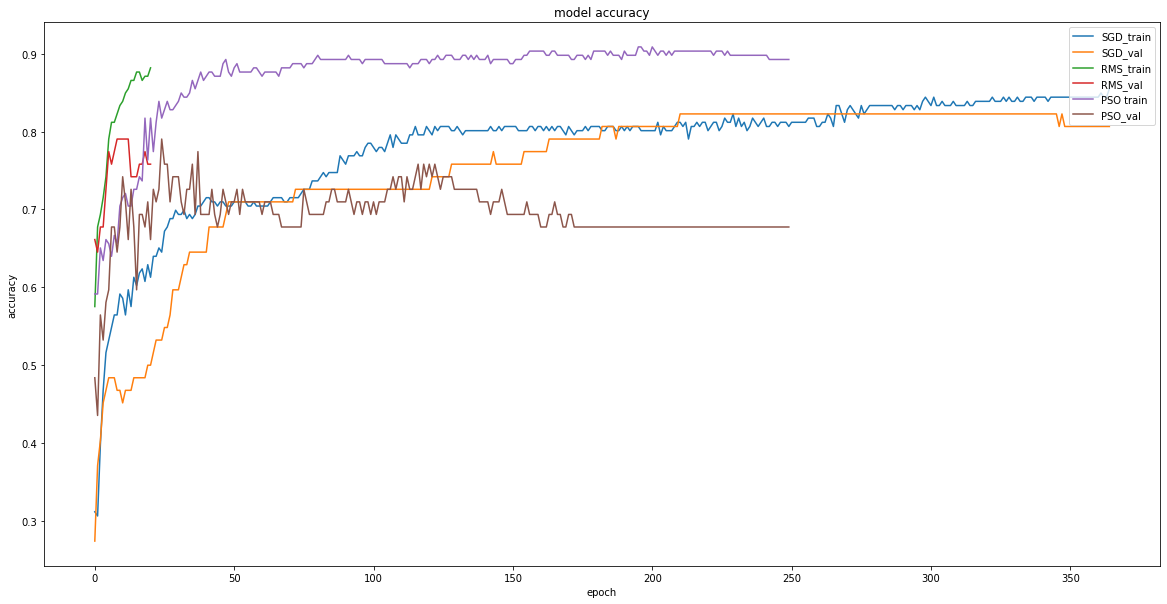

In [33]:
from matplotlib import  pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])

plt.plot(PSO_train_acc)
plt.plot(PSO_val_acc)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD_train', 'SGD_val', 'RMS_train', 'RMS_val', 'PSO train', 'PSO_val'], loc='upper right')
plt.show()

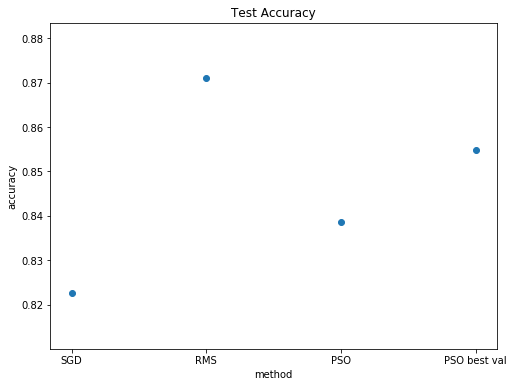

In [40]:
from matplotlib import  pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.scatter([1,2,3,4],[SGD_acc, RMS_acc, PSO_acc, PSO_acc_best_val], marker='o')
plt.xticks([1,2,3,4], ['SGD', 'RMS', 'PSO', 'PSO best val'])

plt.title('Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('method')

plt.show()


# Save Model

In [0]:
model.save_weights('/content/drive/My Drive/Kuliahku/KK/weights/SGD_weights.h5')
model2.save_weights('/content/drive/My Drive/Kuliahku/KK/weights/RMS_weights')

In [0]:
import codecs, json

file_path = "/content/drive/My Drive/Kuliahku/KK/weights/PSO_bestpos.json"
json.dump(pos.tolist(), codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4) ### this saves the array in .json format

file_path = "/content/drive/My Drive/Kuliahku/KK/weights/PSO_bestval.json"
json.dump(pos.tolist(), codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4) ### this saves the array in .json format

## Save Classes

In [0]:
import os

DATADIR = '/content/drive/My Drive/Kuliahku/KK'
with open(os.path.join(DATADIR, 'class.txt'), 'w') as f:
  for x in classes:
    f.write(x+'\n')
